# Create AMITT incident visualisations

Many thanks to https://python-graph-gallery.com/91-customize-seaborn-heatmap/

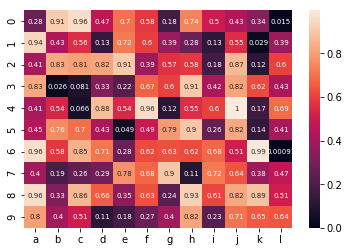

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import amitt

# Check that heatmap works
df = pd.DataFrame(np.random.random((10,12)), columns=["a","b","c","d","e","f","g","h","i","j","k","l"])
sns.heatmap(df, annot=True, annot_kws={"size": 7})

array([[ 5,  0,  8, 11,  1, 12,  2,  3,  1,  4,  2,  0],
       [ 2,  0,  1,  1,  1,  4,  2,  2,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  3,  4, 10,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 10,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  2,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2,  3,  1,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  3,  1, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 12, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0]])

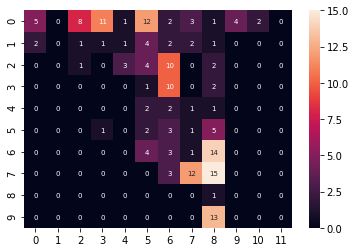

In [2]:
amitt = amitt.Amitt()

techcounts = amitt.it[['id_incident','id_technique']].drop_duplicates().groupby('id_technique').count().to_dict()['id_incident']
techlabels = amitt.grid[2:][:]
nrows = len(techlabels)
ncols = len(techlabels[0])
techgrid = np.zeros([nrows, ncols], dtype = int)

for row in range(nrows):
    for col in range(ncols):
        if techlabels[row][col] in techcounts:
            techgrid[row][col] = techcounts[techlabels[row][col]]

sns.heatmap(techgrid, annot=True, annot_kws={"size": 7})
techgrid